In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings

In [ ]:
os.chdir('/content/drive/MyDrive/리스크공모전')
os.getcwd()

'/content/drive/MyDrive/리스크공모전'

In [ ]:
data=pd.read_csv('1988부터2023년기본기온데이터.csv',encoding='UTF-8')

<ipython-input-4-87045c59dba2>:1: DtypeWarning: Columns (60) have mixed types. Specify dtype option on import or set low_memory=False.
  data=pd.read_csv('1988부터2023년기본기온데이터.csv',encoding='UTF-8')


In [ ]:
data.shape

(264460, 65)

In [ ]:
data.columns

Index(['지점', '지점명', '일시', '평균기온(°C)', '최저기온(°C)', '최저기온 시각(hhmi)', '최고기온(°C)',
       '최고기온 시각(hhmi)', '강수 계속시간(hr)', '10분 최다 강수량(mm)', '10분 최다강수량 시각(hhmi)',
       '1시간 최다강수량(mm)', '1시간 최다 강수량 시각(hhmi)', '일강수량(mm)', '최대 순간 풍속(m/s)',
       '최대 순간 풍속 풍향(16방위)', '최대 순간풍속 시각(hhmi)', '최대 풍속(m/s)', '최대 풍속 풍향(16방위)',
       '최대 풍속 시각(hhmi)', '평균 풍속(m/s)', '풍정합(100m)', '최다풍향(16방위)',
       '평균 이슬점온도(°C)', '최소 상대습도(%)', '최소 상대습도 시각(hhmi)', '평균 상대습도(%)',
       '평균 증기압(hPa)', '평균 현지기압(hPa)', '최고 해면기압(hPa)', '최고 해면기압 시각(hhmi)',
       '최저 해면기압(hPa)', '최저 해면기압 시각(hhmi)', '평균 해면기압(hPa)', '가조시간(hr)',
       '합계 일조시간(hr)', '1시간 최다일사 시각(hhmi)', '1시간 최다일사량(MJ/m2)', '합계 일사량(MJ/m2)',
       '일 최심신적설(cm)', '일 최심신적설 시각(hhmi)', '일 최심적설(cm)', '일 최심적설 시각(hhmi)',
       '합계 3시간 신적설(cm)', '평균 전운량(1/10)', '평균 중하층운량(1/10)', '평균 지면온도(°C)',
       '최저 초상온도(°C)', '평균 5cm 지중온도(°C)', '평균 10cm 지중온도(°C)',
       '평균 20cm 지중온도(°C)', '평균 30cm 지중온도(°C)', '0.5m 지중온도(°C)',
       '1.0m 지중온도(°C)', '1.5m 지중온도(°C)', '3.0m 지중온

In [ ]:
data['일시'].str.split('-').str[0].unique()

array(['1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003',
       '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011',
       '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019',
       '2020', '2021', '2022', '2023'], dtype=object)

In [ ]:
data['일시'].str.split('-').str[1].unique()

array(['02', '03', '04'], dtype=object)

<Axes: >

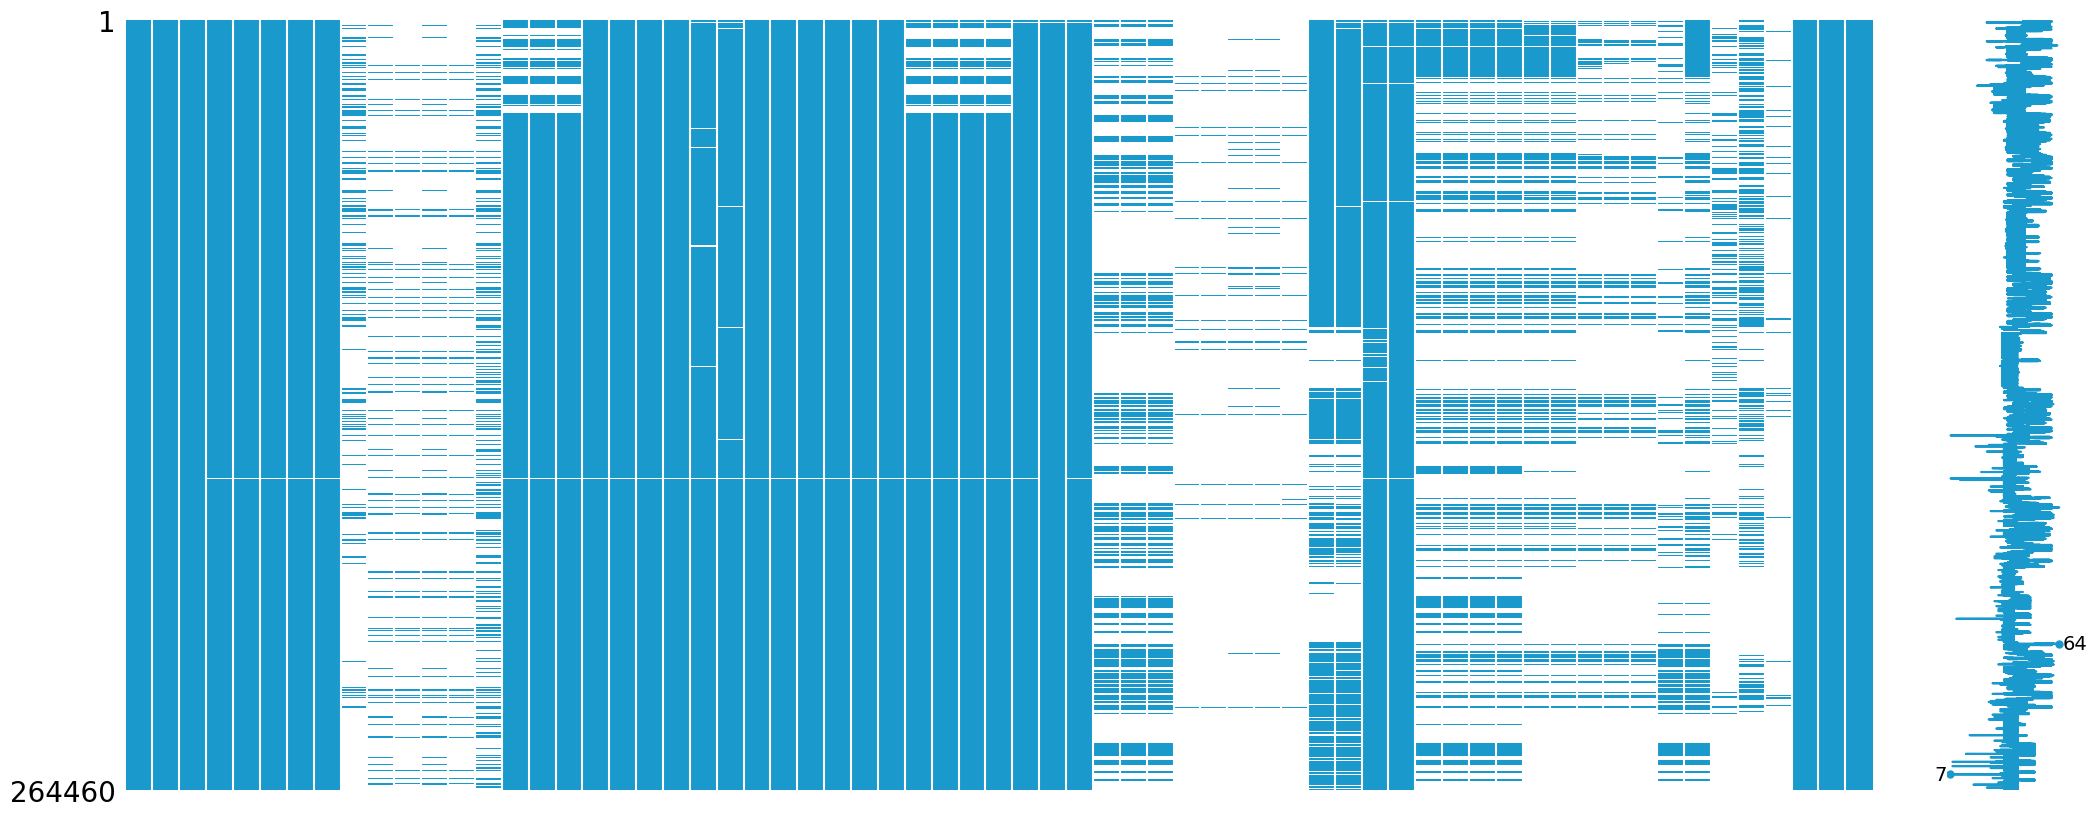

In [ ]:
import missingno as msno
msno.matrix(df=data.iloc[:, :], color=(0.1, 0.6, 0.8))

#합계 일사량 변수 예측

In [ ]:
imp=pd.read_csv('기상보간linear.csv',encoding='UTF-8')

In [ ]:
imp.columns

Index(['일 최심적설(cm)', '일시', '합계 3시간 신적설(cm)', '안개 계속시간(hr)', '일강수량(mm)',
       '일 최심신적설(cm)', '지점', '지점명', '평균기온(°C)', '최저기온(°C)', '최고기온(°C)',
       '최대 순간 풍속(m/s)', '최대 순간 풍속 풍향(16방위)', '최대 풍속(m/s)', '최대 풍속 풍향(16방위)',
       '평균 풍속(m/s)', '풍정합(100m)', '최다풍향(16방위)', '평균 이슬점온도(°C)', '최소 상대습도(%)',
       '평균 상대습도(%)', '평균 증기압(hPa)', '평균 현지기압(hPa)', '최고 해면기압(hPa)',
       '최저 해면기압(hPa)', '평균 해면기압(hPa)', '가조시간(hr)', '합계 일조시간(hr)',
       '평균 전운량(1/10)', '평균 지면온도(°C)', '최저 초상온도(°C)', '해양'],
      dtype='object')

In [ ]:
imp1=pd.read_csv('기상보간iter.csv',encoding='UTF-8')

In [ ]:
imp1.columns

Index(['일 최심적설(cm)', '일시', '합계 3시간 신적설(cm)', '안개 계속시간(hr)', '일강수량(mm)',
       '일 최심신적설(cm)', '지점', '지점명', '평균기온(°C)', '최저기온(°C)', '최고기온(°C)',
       '최대 순간 풍속(m/s)', '최대 순간 풍속 풍향(16방위)', '최대 풍속(m/s)', '최대 풍속 풍향(16방위)',
       '평균 풍속(m/s)', '풍정합(100m)', '최다풍향(16방위)', '평균 이슬점온도(°C)', '최소 상대습도(%)',
       '평균 상대습도(%)', '평균 증기압(hPa)', '평균 현지기압(hPa)', '최고 해면기압(hPa)',
       '최저 해면기압(hPa)', '평균 해면기압(hPa)', '가조시간(hr)', '합계 일조시간(hr)',
       '평균 전운량(1/10)', '평균 지면온도(°C)', '최저 초상온도(°C)', '해양'],
      dtype='object')

In [ ]:
cols=['평균기온(°C)', '최저기온(°C)','최고기온(°C)', '일강수량(mm)', '평균 상대습도(%)',
       '가조시간(hr)', '합계 일조시간(hr)', '평균 전운량(1/10)']

#train data
y_=data['합계 일사량(MJ/m2)'][data['합계 일사량(MJ/m2)'].notna()].index
y1=data['합계 일사량(MJ/m2)'][data['합계 일사량(MJ/m2)'].notna()]
x1=imp[cols].loc[y_]
train=pd.concat([x1,y1],axis=1)

#test data
y__=data['합계 일사량(MJ/m2)'][data['합계 일사량(MJ/m2)'].isna()].index
y2=data['합계 일사량(MJ/m2)'][data['합계 일사량(MJ/m2)'].isna()]
x2=imp[cols].loc[y__]

In [ ]:
!pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 483.9/483.9 kB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 24.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.4/153.4 kB 14.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.8/81.8 kB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 16.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 10.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 10.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.4/73.4 kB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 73.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 60.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 75.5 MB/s eta 0:

In [ ]:
!pip install --upgrade scipy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.3/36.3 MB 7.7 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.10.1
    Uninstalling scipy-1.10.1:
      Successfully uninstalled scipy-1.10.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pycaret 3.1.0 requires scipy~=1.10.1, but you have scipy 1.11.2 which is incompatible.


In [ ]:
from pycaret.regression import *

reg = setup(data=train,
            target='합계 일사량(MJ/m2)',
            train_size=0.8,
            fold=5,
            fold_shuffle=True,
            feature_selection = False,
            session_id = 42)

,Description,Value
0,Session id,42
1,Target,합계 일사량(MJ/m2)
2,Target type,Regression
3,Original data shape,"(94354, 9)"
4,Transformed data shape,"(94354, 9)"
5,Transformed train set shape,"(75483, 9)"
6,Transformed test set shape,"(18871, 9)"
7,Numeric features,8
8,Preprocess,True
9,Imputation type,simple


In [ ]:
best1 = compare_models(sort='rmse')

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,1.6083,4.7667,2.1832,0.8911,0.1993,0.2129,1.0000
xgboost,Extreme Gradient Boosting,1.6141,4.8137,2.1940,0.8900,0.1997,0.2141,7.2720
gbr,Gradient Boosting Regressor,1.6370,4.9095,2.2157,0.8878,0.2025,0.2178,8.0580
rf,Random Forest Regressor,1.6399,4.9271,2.2197,0.8874,0.2001,0.2159,35.1240
et,Extra Trees Regressor,1.6368,4.9288,2.2200,0.8874,0.1996,0.2169,17.6880
knn,K Neighbors Regressor,2.0283,7.1210,2.6684,0.8373,0.2421,0.2809,2.2800
ada,AdaBoost Regressor,2.4736,9.5756,3.0931,0.7812,0.2949,0.3880,2.5880
dt,Decision Tree Regressor,2.3172,9.9627,3.1564,0.7724,0.2821,0.2762,0.5040
ridge,Ridge Regression,2.2360,11.3102,3.3206,0.7415,0.2747,0.3251,0.0900
lar,Least Angle Regression,2.2360,11.3102,3.3206,0.7415,0.2747,0.3251,0.0720


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

In [ ]:
tuned_clf = tune_model(best1, optimize='mae')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,1.6155,4.7934,2.1894,0.8921,0.2027,0.2312
1,1.6235,4.8605,2.2047,0.8887,0.1998,0.2268
2,1.6109,4.6914,2.1660,0.8927,0.1964,0.1960
3,1.6216,4.8668,2.2061,0.8866,0.2010,0.1980
4,1.5936,4.7231,2.1733,0.8930,0.2003,0.2247
Mean,1.6130,4.7870,2.1879,0.8906,0.2001,0.2153
Std,0.0107,0.0708,0.0162,0.0025,0.0021,0.0151


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 5 folds for each of 10 candidates, totalling 50 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [ ]:
pred = predict_model(best, data=x2)

In [ ]:
pred.rename(columns={"prediction_label" : '합계 일사량(MJ/m2)'},inplace=True)
pred.columns

Index(['평균기온(°C)', '최저기온(°C)', '최고기온(°C)', '일강수량(mm)', '평균 상대습도(%)',
       '가조시간(hr)', '합계 일조시간(hr)', '평균 전운량(1/10)', '합계 일사량(MJ/m2)'],
      dtype='object')